In [1]:
import import_ipynb

import numpy as np
import pandas as pd
import time as timer
import matplotlib.pyplot as plt


In [2]:
from mondrian_graph import *
from mondrian_functions  import *

importing Jupyter notebook from mondrian_graph.ipynb
importing Jupyter notebook from mondrian_functions.ipynb


In [3]:
#Get data from CSV
file_name = 'dataset/data_{}k.csv'

ks = [10,5] #k=10, k=5
sizes = [1, 2 , 5, 10, 20 , 30] #they are in thousands
quasi_identifiers = ["age","zip_code"] # quasi identifier


results = []

# Mondrian flow

In [4]:
 

for size in sizes:
    for k in ks:
        file = file_name.format(size)
        print(file)
        data = pd.read_csv(file)

        dataset_size = data.shape[0]
        print('Iterating dataset of ', dataset_size)

        qi_df = pd.DataFrame(data, columns = quasi_identifiers)

        start_time = timer.time()

        # K no of rows same in the qi_data
        anonymized_data = recursive_iteration(qi_df, k)

        end_time = timer.time()
        time_taken = end_time - start_time
        results.append([dataset_size, time_taken,k])

        print('Time takes: ', time_taken)

        print('Anonymized Data: ', anonymized_data)
        print('---------------------------------')


dataset/data_1k.csv
Iterating dataset of  1000
Time takes:  1.1558072566986084
Anonymized Data:         age     zip_code
0    25-43  61854-67735
1    25-43  61854-67735
2    25-43  61854-67735
3    25-43  61854-67735
4    25-43  61854-67735
..     ...          ...
995  26-44  61029-68106
996  26-44  61029-68106
997  26-44  61029-68106
998  26-44  61029-68106
999  26-44  61029-68106

[1000 rows x 2 columns]
---------------------------------
dataset/data_1k.csv
Iterating dataset of  1000
Time takes:  1.2330005168914795
Anonymized Data:         age     zip_code
0    25-39  62565-67735
1    25-39  62565-67735
2    25-39  62565-67735
3    25-39  62565-67735
4    31-43  61854-67235
..     ...          ...
995  26-44  61029-68106
996  26-44  61029-68106
997  29-43  63613-66608
998  29-43  63613-66608
999  29-43  63613-66608

[1000 rows x 2 columns]
---------------------------------
dataset/data_2k.csv
Iterating dataset of  1999
Time takes:  1.2505640983581543
Anonymized Data:          age    

In [5]:

size = np.array(results)[:,0]
time = np.array(results)[:,1]
k = np.array(results)[:,2]

column_values = ['size', 'time', 'k']
df = pd.DataFrame(data = results, 
                  columns = column_values)


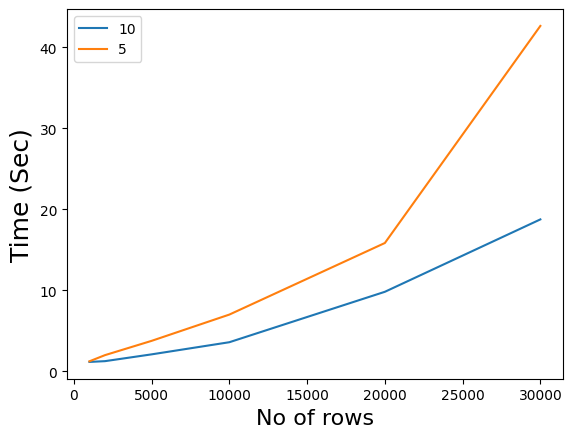

In [6]:
plt.figure()
plt.ylabel('Time (Sec)', fontsize=18)
plt.xlabel('No of rows', fontsize=16)

for k in ks:
    plt.plot(
        df[df['k']==k]['size'], 
        df[df['k']==k]['time'], 
        label=k)
plt.legend()
plt.show()

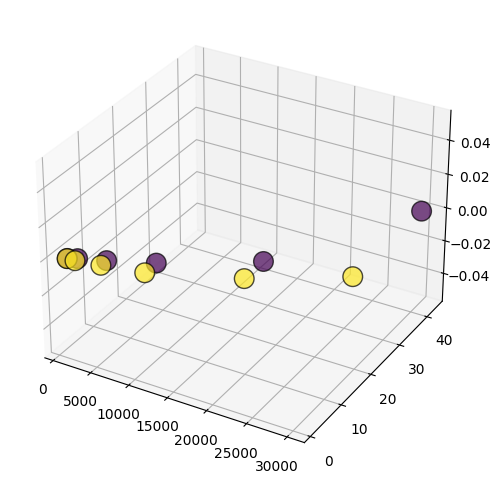

In [7]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['size'], df['time'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=df['k'])
